# STAT 5052 Project

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.formula.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

## Data loading and preprocessing

In [3]:
insuranceDF = pd.read_csv('insurance.csv') 

In [5]:
insuranceDF.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insuranceDF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
X = insuranceDF[['age','sex','bmi','smoker','region']]
y = insuranceDF[['charges']]

In [12]:
regressionData = insuranceDF

In [13]:
gender = {'male': 1,'female': 0}
smoker = {'yes': 1, 'no': 0}
regressionData['sex'] = [gender[item] for item in regressionData['sex']]
regressionData['smoker'] = [smoker[item] for item in regressionData['smoker']]



In [14]:
regressionData = pd.get_dummies(regressionData, columns=['region'])

In [15]:
# multipleRegression = linear_model.LinearRegression().fit(regressionX,regressionY)

In [16]:
regressionData.head(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Multiple linear regression

In [10]:
regressionResult = sm.ols(formula="charges ~ age + sex + bmi + children + smoker + region_northeast + region_northwest + region_southeast + region_southwest", data=regressionData).fit()

In [11]:
print(regressionResult.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:46:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.002e+04    781.640  

## Decision Tree classifier

In [12]:
label_encoder = LabelEncoder()
n_bins = 20

In [13]:
region = {'northeast': 0, 'northwest': 1, 'southeast' : 2, 'southwest': 3}
insuranceDF['region'] = [region[item] for item in insuranceDF['region']]

In [14]:
decisionTreeX = insuranceDF
decisionTreeY = y.to_numpy().flatten()

In [15]:
decisionTreeYGroup = label_encoder.fit_transform(pd.cut(decisionTreeY, n_bins, retbins=True)[0])

In [16]:
decisionTreeY

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

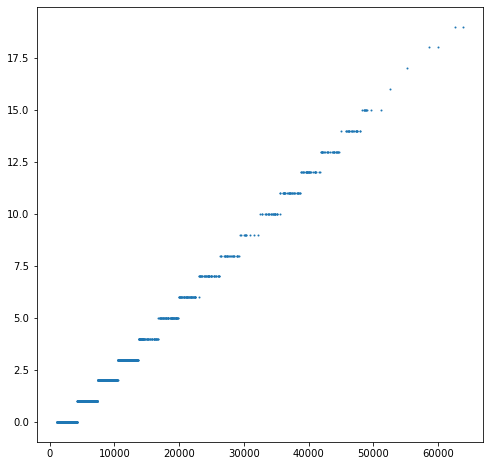

In [17]:
fig = plt.figure(figsize=(8,8))
plt.scatter(decisionTreeY, decisionTreeYGroup, s = 1, label=decisionTreeYGroup)

In [18]:
dec_X_train, dec_X_test, dec_y_train, dec_y_test = train_test_split(decisionTreeX, decisionTreeYGroup, test_size=0.20)

In [19]:
clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 7, random_state=17)

In [20]:
dec_X_train

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
849,55,1,32.775,0,0,1,10601.63225
6,46,0,33.440,1,0,2,8240.58960
684,33,0,18.500,1,0,3,4766.02200
609,30,1,37.800,2,1,3,39241.44200
...,...,...,...,...,...,...,...
414,19,0,35.150,0,0,1,2134.90150
1008,25,1,24.985,2,0,0,23241.47453
1134,28,1,33.820,0,0,1,19673.33573
282,30,1,27.645,1,0,0,4237.12655


In [21]:
clf_tree.fit(dec_X_train, dec_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)

In [22]:
y_pred = clf_tree.predict(dec_X_test)

In [23]:
print(confusion_matrix(dec_y_test, y_pred))
print(classification_report(dec_y_test, y_pred))

[[57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

C:\Users\godal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\godal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
